<a href="https://colab.research.google.com/github/Raj-dot-GitHub/Python-Finance-Projects/blob/main/Portfolio%20Optimization%20Project/Copy_of_Portfolio_Optimization_with_Python_for_my_mutual_funds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Choosing the best portfolio option for the user.

In [ ]:
# Importing some libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
# Get the symbols/tickers in the portfolio.
assets = ["0P0000XV9V.BO", "0P00011MAX.BO", "0P0000XVUH.BO", "0P0000YWL1.BO"]

In [ ]:
# Assign weights to the assets.
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [ ]:
# Stocks/Portfolio start date.
stockStartDate = "2018-01-02"

In [ ]:
# Get the stocks/portfolio ending date(today).
today = datetime.today().strftime("%Y-%m-%d")
today

'2021-06-08'

In [ ]:
# Creating a dataframe to store the the Adj. Closing Price of the stocks.
df = pd.DataFrame()

In [ ]:
# Storing the adj.closing prices of stocks into the df.
for stock in assets:
    df[stock] = web.DataReader(stock, data_source = "yahoo",start = stockStartDate, end = today)["Adj Close"]

In [ ]:
# Showing the df
df.head(10)

,0P0000XV9V.BO,0P00011MAX.BO,0P0000XVUH.BO,0P0000YWL1.BO
Date,,,,
2018-01-02,55.073002,30.620001,36.200001,23.886700
2018-01-03,55.284000,30.730000,36.400002,23.962400
2018-01-04,55.764999,30.830000,36.439999,24.069201
2018-01-05,56.495998,31.049999,36.820000,24.260201
2018-01-08,56.699001,31.120001,36.910000,24.382500
2018-01-09,56.852001,31.070000,36.779999,24.389000
2018-01-10,56.636002,31.030001,36.680000,24.452700
2018-01-11,56.624001,30.980000,36.630001,24.440300
2018-01-12,56.827000,31.040001,36.709999,24.517900


In [ ]:
df.rename(columns = {"0P0000XV9V.BO":"Mirae Asset Bluechip","0P00011MAX.BO":"Axis Small Cap Fund", "0P0000XVUH.BO":"Axis Midcap Fund", "0P0000YWL1.BO":"Parag Parikh Flexi Cap"}, inplace = True)

In [ ]:
df.isnull().sum()

Mirae Asset Bluechip      0
Axis Small Cap Fund       0
Axis Midcap Fund          0
Parag Parikh Flexi Cap    0
dtype: int64

In [ ]:
df.fillna(method = 'ffill', inplace = True)

In [ ]:
df.isnull().sum()

Mirae Asset Bluechip      0
Axis Small Cap Fund       0
Axis Midcap Fund          0
Parag Parikh Flexi Cap    0
dtype: int64

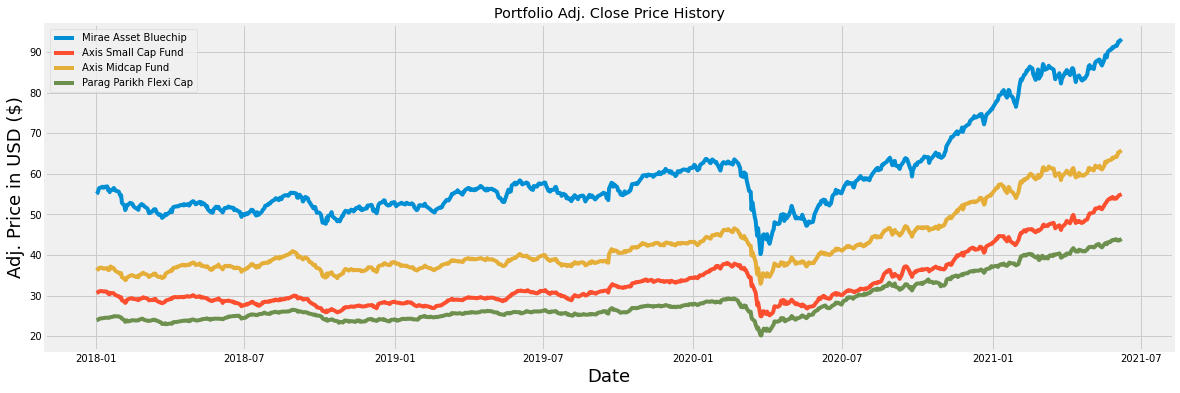

In [ ]:
# Visualizing the stocks/portfolio.
title = "Portfolio Adj. Close Price History"

# Getting the stocks.
my_stocks = df

# Plotting the stocks
plt.figure(figsize = (18,6))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Adj. Price in USD ($)", fontsize = 18)
plt.legend(my_stocks.columns.values, loc = "upper left")

In [ ]:
# Show the daily simple returns
returns = df.pct_change()
returns

,Mirae Asset Bluechip,Axis Small Cap Fund,Axis Midcap Fund,Parag Parikh Flexi Cap
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.003831,0.003592,0.005525,0.003169
2018-01-04,0.008701,0.003254,0.001099,0.004457
2018-01-05,0.013109,0.007136,0.010428,0.007935
2018-01-08,0.003593,0.002254,0.002444,0.005041
...,...,...,...,...
2021-06-01,-0.001363,0.001669,-0.002331,-0.004759
2021-06-02,0.004259,0.007222,0.007322,-0.002572
2021-06-03,0.007688,0.002206,0.010516,0.001397


In [ ]:
# Create and show the annualized covariance matrix.
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,Mirae Asset Bluechip,Axis Small Cap Fund,Axis Midcap Fund,Parag Parikh Flexi Cap
Mirae Asset Bluechip,0.041578,0.029204,0.030421,0.023224
Axis Small Cap Fund,0.029204,0.028159,0.024181,0.017783
Axis Midcap Fund,0.030421,0.024181,0.027040,0.017762
Parag Parikh Flexi Cap,0.023224,0.017783,0.017762,0.020663


In [ ]:
# Calculate the portfolio variance.
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.025161782516801477

In [ ]:
# Calculate the portfolio volatility(Standard deviation).
port_volatility = np.sqrt(port_variance)
port_volatility

0.15862465923305077

In [ ]:
# Calcualute the annual portfolio return.
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights*252)
portfolioSimpleAnnualReturn

0.18906573090500814

In [ ]:
# Show the expected annual returns, volatility(risk) and variance.

percent_var = str(round(port_variance, 2)*100) + " %"
percent_volt = str(round(port_volatility, 2)*100) + " %"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + " %"

print("Expected annual returns of our portfolio is "+ percent_ret)
print("Annual volatility(risk) is " + percent_volt)
print("Annual variance is "+ percent_var)

Expected annual returns of our portfolio is 19.0 %
Annual volatility(risk) is 16.0 %
Annual variance is 3.0 %


In [ ]:
## Let's adjust the weightage of the stocks in our portfolio to lower the risk and maximize returns.

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 1.3MB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736127 sha256=1cd2d23a19da6c59cc7e09eb39951242718ae6f5d4bc318226251a8902ad5d9e
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization.

# Calculate the expected returns and the annualised sample covariance matrix of asset returns.
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum "Sharpe Ratio".
ef = EfficientFrontier(mu, S)
new_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('Mirae Asset Bluechip', 0.0), ('Axis Small Cap Fund', 0.01182), ('Axis Midcap Fund', 0.18668), ('Parag Parikh Flexi Cap', 0.80151)])
Expected annual return: 20.0%
Annual volatility: 14.1%
Sharpe Ratio: 1.27


(0.20014487602979453, 0.14134779051350516, 1.2744796036453254)

In [ ]:
 0.14897 + 0.29681 + 0.23115 + 0.32307

1.0

In [ ]:
# Discrete allocation of each share per stock.
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)

allocation, leftover = da.lp_portfolio()
print("Discrete Allocation: ", allocation)
print('Funds remaining: {:.2f} Rs'.format(leftover))

Discrete Allocation:  {'Axis Small Cap Fund': 2, 'Axis Midcap Fund': 28, 'Parag Parikh Flexi Cap': 182}
Funds remaining: 39.11 Rs
